# Data Visualization in Python using Facebook Dataset

<img src="https://raw.githubusercontent.com/barani247/Facebook/main/Facebook_New_Logo_(2015).svg.png" align='left' width="1500" Height="1500"><br/>

<B>Source: Wikipedia </B>
<BR>--------------------------------</BR>
<BR>
<b> ABOUT:</b> Facebook, Inc., is an American technology conglomerate based in Menlo Park, California. It was founded by Mark Zuckerberg, along with his fellow roommates and students at Harvard College, who were Eduardo Saverin, Andrew McCollum, Dustin Moskovitz and Chris Hughes, originally as TheFacebook.com—today's Facebook, a popular global social networking service. It is one of the world's most valuable companies. It is considered one of the Big Five companies in U.S. information technology, with Google, Apple, Microsoft and Amazon.
<br>

Facebook offers other products and services beyond its social networking platform, including Facebook Messenger, Facebook Watch, and Facebook Portal. It also has acquired Instagram, WhatsApp, Oculus, Giphy and Mapillary, and has a 9.9% stake in Jio Platforms.

In [1]:
#Python Version
from platform import python_version
print("Python Version Used for this Dataset is :",python_version())


Python Version Used for this Dataset is : 3.8.5


## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [2]:
#Importing python libraries for Dataset

import numpy as np
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')                  # To apply seaborn darkgrid style to the plots.
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid',font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.


import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
# Importing the parallel_coordinates from pandas.plotting which will help in plotting the Parallel Coordinates.

from pandas.plotting import parallel_coordinates
# Install and update plotly using this command to the latest version (higher than version 4.0.0)



In [3]:
#To read the raw data from github page
df_fb = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv")

In [4]:
# To check on First 5 rows
df_fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [5]:
#To check on number of rows & Cols
df_fb.shape

(99003, 15)

In [6]:
#To check on Dataset Schema
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [7]:
# To check which column is unique, null and not-null values. If unique found then set as Index column
df_fb.agg(['count', 'size','nunique'])

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003,99003,99003,99003,99003,98828,99001,99003,99003,99003,99003,99003,99003,99003,99003
size,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003
nunique,99003,101,31,101,12,2,2426,2562,1519,2924,2681,2396,2004,1726,1636


In [8]:
# To check for Null rows in Gender columns
df_fb[df_fb['gender'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.0,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.0,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.0,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.0,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.0,5,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94778,1748557,68,27,1945,4,NaN,1862.0,790,435,422,425,410,318,12,107
95317,2173780,50,11,1963,9,NaN,2129.0,863,389,49,781,24,327,25,454
95479,1442490,108,1,1905,7,NaN,1332.0,967,537,150,1311,76,671,74,640
97530,2119521,74,26,1939,9,NaN,1998.0,1609,348,313,834,179,696,134,138


In [9]:
#Find out the most frequent value & mode  .idxmax() method 
df_fb['gender'].value_counts().idxmax()
# max value (mode) = "male" 

'male'

In [10]:
#Replace the mode value (male) with our missing values
df_fb['gender'].replace(np.nan, "male", inplace = True)

In [11]:
df_fb[df_fb['gender'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received


In [12]:
#set userd id as Index
df_fb.set_index('userid', inplace=True)
#view the record
df_fb.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [13]:
#To check on Dataset Schema post changes
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    99003 non-null  int64  
 1   dob_day                99003 non-null  int64  
 2   dob_year               99003 non-null  int64  
 3   dob_month              99003 non-null  int64  
 4   gender                 99003 non-null  object 
 5   tenure                 99001 non-null  float64
 6   friend_count           99003 non-null  int64  
 7   friendships_initiated  99003 non-null  int64  
 8   likes                  99003 non-null  int64  
 9   likes_received         99003 non-null  int64  
 10  mobile_likes           99003 non-null  int64  
 11  mobile_likes_received  99003 non-null  int64  
 12  www_likes              99003 non-null  int64  
 13  www_likes_received     99003 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usa

In [14]:
#To check on rows where Tenure column is Null
df_fb[df_fb['tenure'].isnull()]

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
2095829,103,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [15]:
#use median of tenure value for null
print(df_fb['tenure'].median())

412.0


In [16]:
#To assign null value with Median value
df_fb['tenure'].replace(np.nan, df_fb['tenure'].median(), inplace = True)

In [17]:
#To check are the null values are removed
df_fb[df_fb['tenure'].isnull()]

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,


In [18]:
#To check on Dataset Schema post changes
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    99003 non-null  int64  
 1   dob_day                99003 non-null  int64  
 2   dob_year               99003 non-null  int64  
 3   dob_month              99003 non-null  int64  
 4   gender                 99003 non-null  object 
 5   tenure                 99003 non-null  float64
 6   friend_count           99003 non-null  int64  
 7   friendships_initiated  99003 non-null  int64  
 8   likes                  99003 non-null  int64  
 9   likes_received         99003 non-null  int64  
 10  mobile_likes           99003 non-null  int64  
 11  mobile_likes_received  99003 non-null  int64  
 12  www_likes              99003 non-null  int64  
 13  www_likes_received     99003 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usa

In [19]:
#Converting Tenure from Object to Integer
df_fb['tenure'] = pd.to_numeric(df_fb['tenure'])
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    99003 non-null  int64  
 1   dob_day                99003 non-null  int64  
 2   dob_year               99003 non-null  int64  
 3   dob_month              99003 non-null  int64  
 4   gender                 99003 non-null  object 
 5   tenure                 99003 non-null  float64
 6   friend_count           99003 non-null  int64  
 7   friendships_initiated  99003 non-null  int64  
 8   likes                  99003 non-null  int64  
 9   likes_received         99003 non-null  int64  
 10  mobile_likes           99003 non-null  int64  
 11  mobile_likes_received  99003 non-null  int64  
 12  www_likes              99003 non-null  int64  
 13  www_likes_received     99003 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usa

In [20]:
#To check on Coerce errors
print (df_fb[pd.to_numeric(df_fb.tenure, errors='coerce').isnull()])

Empty DataFrame
Columns: [age, dob_day, dob_year, dob_month, gender, tenure, friend_count, friendships_initiated, likes, likes_received, mobile_likes, mobile_likes_received, www_likes, www_likes_received]
Index: []


In [21]:
#Convert Tenure to Int64 datatype
df_fb['tenure'] = df_fb['tenure'].astype('int64')
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    99003 non-null  int64 
 1   dob_day                99003 non-null  int64 
 2   dob_year               99003 non-null  int64 
 3   dob_month              99003 non-null  int64 
 4   gender                 99003 non-null  object
 5   tenure                 99003 non-null  int64 
 6   friend_count           99003 non-null  int64 
 7   friendships_initiated  99003 non-null  int64 
 8   likes                  99003 non-null  int64 
 9   likes_received         99003 non-null  int64 
 10  mobile_likes           99003 non-null  int64 
 11  mobile_likes_received  99003 non-null  int64 
 12  www_likes              99003 non-null  int64 
 13  www_likes_received     99003 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 11.3+ MB


In [22]:
#assign gender to Categorical codes
df_fb['gender'] = df_fb['gender'].astype('category')
df_fb['gender'] = df_fb['gender'].cat.codes
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    99003 non-null  int64
 1   dob_day                99003 non-null  int64
 2   dob_year               99003 non-null  int64
 3   dob_month              99003 non-null  int64
 4   gender                 99003 non-null  int8 
 5   tenure                 99003 non-null  int64
 6   friend_count           99003 non-null  int64
 7   friendships_initiated  99003 non-null  int64
 8   likes                  99003 non-null  int64
 9   likes_received         99003 non-null  int64
 10  mobile_likes           99003 non-null  int64
 11  mobile_likes_received  99003 non-null  int64
 12  www_likes              99003 non-null  int64
 13  www_likes_received     99003 non-null  int64
dtypes: int64(13), int8(1)
memory usage: 10.7 MB


In [23]:
#conver the gender from categorical to Int64
df_fb['gender'] = df_fb['gender'].astype('int64')
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    99003 non-null  int64
 1   dob_day                99003 non-null  int64
 2   dob_year               99003 non-null  int64
 3   dob_month              99003 non-null  int64
 4   gender                 99003 non-null  int64
 5   tenure                 99003 non-null  int64
 6   friend_count           99003 non-null  int64
 7   friendships_initiated  99003 non-null  int64
 8   likes                  99003 non-null  int64
 9   likes_received         99003 non-null  int64
 10  mobile_likes           99003 non-null  int64
 11  mobile_likes_received  99003 non-null  int64
 12  www_likes              99003 non-null  int64
 13  www_likes_received     99003 non-null  int64
dtypes: int64(14)
memory usage: 11.3 MB


In [24]:
#To Check on list whether all columns converted to numerical.
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'
def print_categories(df_fb):
    for column_name in df_fb.columns:
        print(column_name, ": ", get_var_category(df_fb[column_name]))
print_categories(df_fb)


age :  Numerical
dob_day :  Numerical
dob_year :  Numerical
dob_month :  Numerical
gender :  Numerical
tenure :  Numerical
friend_count :  Numerical
friendships_initiated :  Numerical
likes :  Numerical
likes_received :  Numerical
mobile_likes :  Numerical
mobile_likes_received :  Numerical
www_likes :  Numerical
www_likes_received :  Numerical


In [25]:
#To check on Dataset Schema post changes and describe the dataset
df_fb.info()
df_fb.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    99003 non-null  int64
 1   dob_day                99003 non-null  int64
 2   dob_year               99003 non-null  int64
 3   dob_month              99003 non-null  int64
 4   gender                 99003 non-null  int64
 5   tenure                 99003 non-null  int64
 6   friend_count           99003 non-null  int64
 7   friendships_initiated  99003 non-null  int64
 8   likes                  99003 non-null  int64
 9   likes_received         99003 non-null  int64
 10  mobile_likes           99003 non-null  int64
 11  mobile_likes_received  99003 non-null  int64
 12  www_likes              99003 non-null  int64
 13  www_likes_received     99003 non-null  int64
dtypes: int64(14)
memory usage: 11.3 MB


,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,14.530408,1975.719776,6.283365,0.593406,537.884832,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,9.015606,22.589748,3.529672,0.491200,457.645601,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,1963.000000,3.000000,0.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.000000,1985.000000,6.000000,1.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,22.000000,1993.000000,9.000000,1.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,31.000000,2000.000000,12.000000,1.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


## Exploratory Analysis and Visualization

Columns we'll analyze:

1. Gender
2. Age
3. Tenure
4. Friend_Count & Friendships_intitiated
5. Likes & Likes_received
6. www likes & www_likes_received
7. mobile likes & mobile_likes_received


In [26]:
# To check on list of columns
df_fb.columns

Index(['age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

## Ask & answer questions

1. How many users are using FB based on Gender Type?
2. Which Age groups are frequent users of Facebook application?
3. Which Age groups are frequent users of Facebook appplication by Gendertype?
4. Among the users, which Device/App were used by users to give likes?
5. Which Gender group has more facebook friends?
6. How long the users are in FB(tenure) and based on their Age Group
7. Which Gender as intiated more friendship request?
8. Which Age group have provided more like (Given & Recieved)Vs Friend Count
9. HeatMap Correlation based on different variables?

### How many users are using FB based on Gender Type?

In [27]:
#Get value of FB users based on Gender type
df_fb['gender'].value_counts()

1    58749
0    40254
Name: gender, dtype: int64

Text(0.5, 1.0, 'Facebook users by GenderWise')

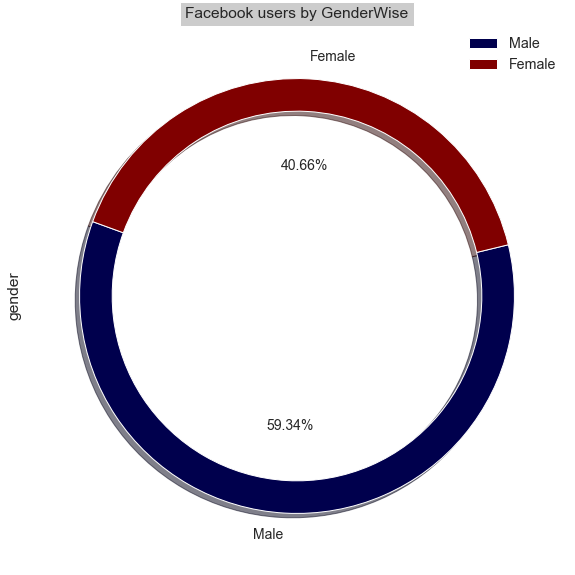

In [28]:
# Plot a Pie chart to display number of male and Female users. 1 - Male and 0 - Female
df_fb['gender'].value_counts().plot(kind='pie', fontsize=14, autopct='%.2f%%', wedgeprops=dict(width=0.15),shadow=True, startangle=160, figsize=(10,10), cmap='seismic', legend=True, labels = ['Male','Female'])
plt.title("Facebook users by GenderWise", bbox={'facecolor':'0.8', 'pad':5})

### Which Age groups are frequent users of Facebook application?

In [29]:
# Get a tabled information to display by Age wise users of FB
df_fb.iloc[df_fb['gender']].sort_values(ascending=True, by = ['age'])

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
1192601,14,2,1999,11,0,6,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,0,6,0,0,0,0,0,0,0,0
2094382,14,19,1999,11,1,266,0,0,0,0,0,0,0,0
2094382,14,19,1999,11,1,266,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,0,6,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192601,14,2,1999,11,0,6,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,0,6,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,0,6,0,0,0,0,0,0,0,0


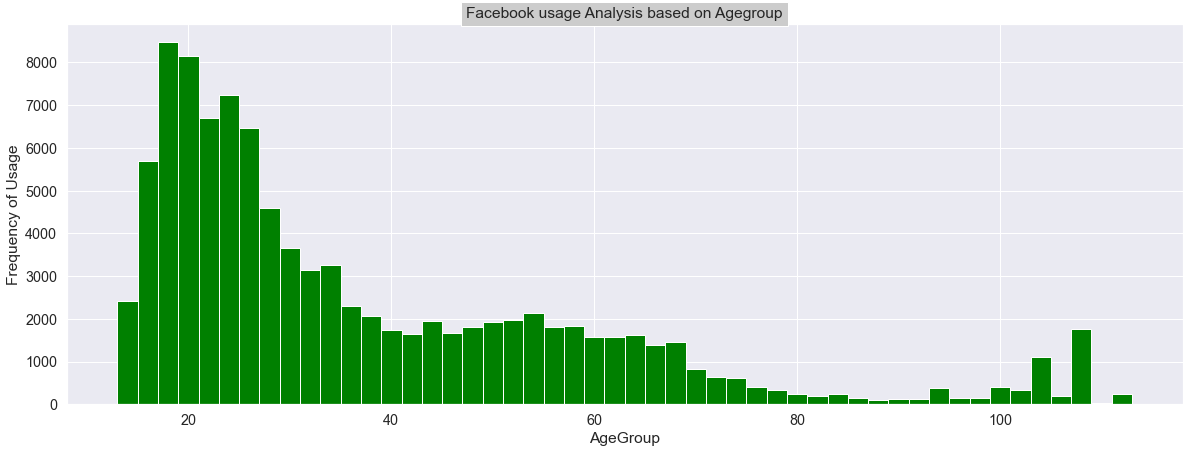

In [30]:
#To Plot (Histogram Chart) the Frequency of usage based on Agegroup.
df_fb['age'].plot(kind='hist',  figsize=(20, 7), color='green',bins = 50)
plt.xlabel('AgeGroup')
plt.ylabel('Frequency of Usage')
plt.title("Facebook usage Analysis based on Agegroup", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

### Which Age groups are frequent users of Facebook appplication by Gendertype?

In [31]:

# The following analysis we are doing against Date Of birth and Gender
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90','91-100','101-110','111-120']
df_fb['age_group'] = pd.cut(df_fb.age, [10,20,30,40,50,60,70,80,90,100,110,120], right=True, labels=labels)
df_fb['age_group'] = df_fb['age_group'].astype('category')

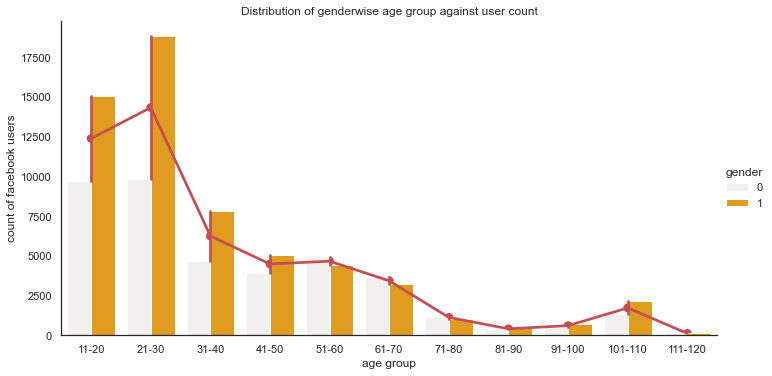

In [32]:
#To generate the distribution of genderwise age group against user count
sns.set()
groupByAgeGroupAndGender = df_fb.groupby(['age_group','gender']).size().reset_index(name='counts')
with sns.axes_style('white'):
    g = sns.factorplot("age_group", data=df_fb, aspect=2,
                       kind="count", hue="gender", color='orange') 
    sns.pointplot(x='age_group', y='counts', data=groupByAgeGroupAndGender, color='r')

plt.title("Distribution of genderwise age group against user count")
plt.ylabel('count of facebook users')
plt.xlabel('age group');
plt.show()

### Among the users, which Device/App were used  by users to give likes?

In [33]:
# find the total sum of mobile & www likes and assign to a dataframe df_users
mobile = df_fb.mobile_likes.sum()
print("Mobile Users:", mobile)
internet = df_fb.www_likes.sum()
print("Internet users:", internet)
df_users = pd.DataFrame([mobile,internet], index=['mobile', 'internet'] )
df_users

Mobile Users: 10505832
Internet users: 4946430


,0
mobile,10505832
internet,4946430


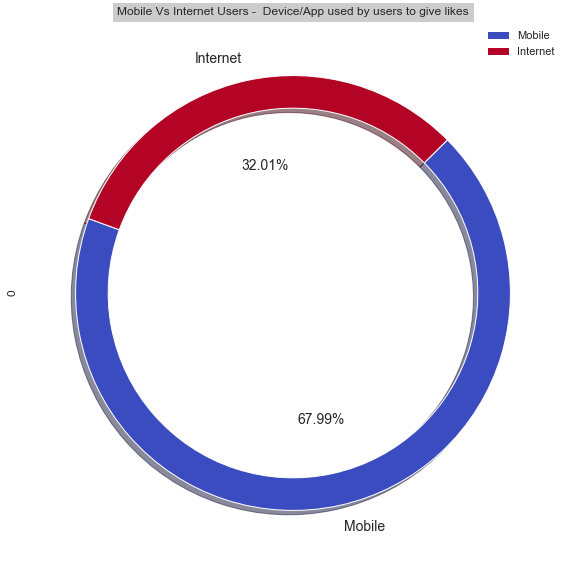

In [34]:
# make the plot
df_users.plot(kind='pie', subplots=True, fontsize=14, autopct='%.2f%%', wedgeprops=dict(width=0.15),shadow=True, startangle=160, figsize=(10,10), cmap='coolwarm', legend=True, labels = ['Mobile','Internet'])
plt.title("Mobile Vs Internet Users -  Device/App used by users to give likes", bbox={'facecolor':'0.8', 'pad':5})
# show the plot
plt.show()

In [35]:
#crosstab view on friend count based on gender
pd.crosstab(df_fb['gender'], df_fb['friend_count'], normalize='columns')

friend_count,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,4717,4720,4724,4731,4732,4733,4735,4737,4754,4755,4759,4765,4767,4770,4792,4794,4797,4803,4817,4826,4844,4845,4863,4917,4923
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.256371,0.285793,0.304387,0.290698,0.309746,0.311787,0.302778,0.330849,0.328691,0.334286,0.327001,0.362556,0.327217,0.342776,0.366906,0.365926,0.362857,0.360759,0.372549,0.355301,0.391813,0.358166,0.394286,0.401734,0.375683,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.743629,0.714207,0.695613,0.709302,0.690254,0.688213,0.697222,0.669151,0.671309,0.665714,0.672999,0.637444,0.672783,0.657224,0.633094,0.634074,0.637143,0.639241,0.627451,0.644699,0.608187,0.641834,0.605714,0.598266,0.624317,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


### Which Gender has more friend counts

In [36]:
#use Groupby function to group Total Sum friend counts by Gender
df_friendcountbygender = df_fb['friend_count'].groupby(df_fb['gender'])#.agg(['size','sum','mean', 'count'])
df_friendcountbygender.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,40254.0,241.969941,476.039706,0.0,37.0,96.0,244.0,4923.0
1,58749.0,165.093176,308.403825,0.0,27.0,74.0,182.0,4917.0


In [37]:
#To get a view on friend count based on gender
df_friendcountbygender.sum().reset_index(name = 'Total')

,gender,Total
0,0,9740258
1,1,9699059


In [38]:
#To get friend count based on gender value
df_fb['gender'].value_counts()


1    58749
0    40254
Name: gender, dtype: int64

### How long the users are in FB(tenure) and based on their Age Group

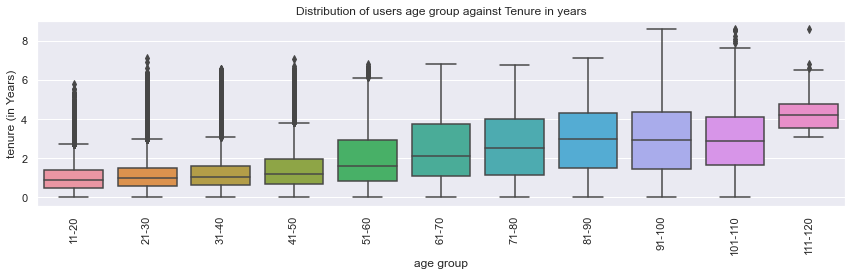

In [39]:
# To get Distribution of users age group against Tenure in years
fig, ax = plt.subplots(figsize=(12,4))
g = sns.boxplot(x="age_group", y=df_fb['tenure']/365, data=df_fb);
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of users age group against Tenure in years")
plt.xlabel('age group');
plt.ylabel('tenure (in Years)');
plt.tight_layout()
plt.show()

### Which Gender group has initiated more friends request

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,40254.0,113.899091,195.139308,0.0,19.0,49.0,124.75,3654.0
1,58749.0,103.035337,184.179499,0.0,15.0,44.0,111.00,4144.0


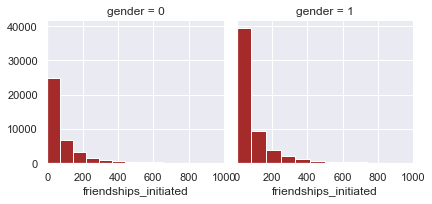

In [40]:
#To get a view on friend intiated based on gender group
df_gender = df_fb[df_fb.gender.notnull()]
x_g = sns.FacetGrid(df_gender, col='gender')
x_g = x_g.map(plt.hist, "friendships_initiated", bins = 50, color = 'brown')
plt.xlim(0,1000)
df_fb['friendships_initiated'].groupby(df_fb['gender']).describe()

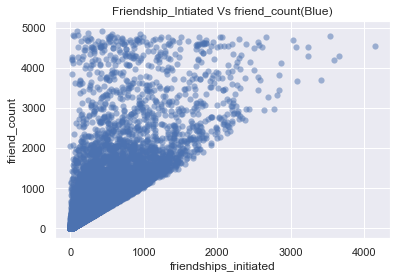

In [41]:
#Scatter Plot - Relationship between Friendship Intitiated and Friend Count
#fig, ax3 = plt.subplots(figsize=(7,5))
#with sns.axes_style('white'):
y = df_fb['friend_count']
x = df_fb['friendships_initiated']
plt.scatter(x, y, marker='o',linewidths=.10, norm=True,plotnonfinite=False, alpha=0.5, cmap='jet')
plt.legend(y,x)
#plt.setp(ax3.get_xticklabels(), rotation=45)
plt.title("Friendship_Intiated Vs friend_count(Blue)")
plt.xlabel('friendships_initiated')
plt.ylabel('friend_count')
plt.show()

### Which Age group have provided more like (Given & Recieved)Vs Friend Count

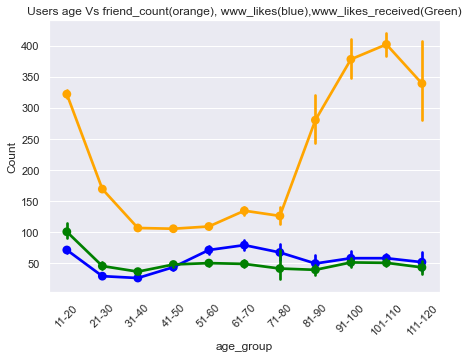

In [42]:
#To get a view on Users age Vs friend_count(orange), www_likes(blue),www_likes_received(Green)
fig, ax = plt.subplots(figsize=(7,5))
with sns.axes_style('white'):
    g = sns.pointplot(x='age_group', y='friend_count', data=df_fb,color='orange',units=1000,legend = True);
    g = sns.pointplot(x='age_group', y='www_likes', data=df_fb,color='blue',units=1000,legend = True);
    g = sns.pointplot(x='age_group', y='www_likes_received', data=df_fb,color='green',units=1000,legend = True);
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Users age Vs friend_count(orange), www_likes(blue),www_likes_received(Green)")
plt.xlabel('age_group')
plt.ylabel('Count')
plt.legend("www_likes","www_likes_recieved")
plt.show()

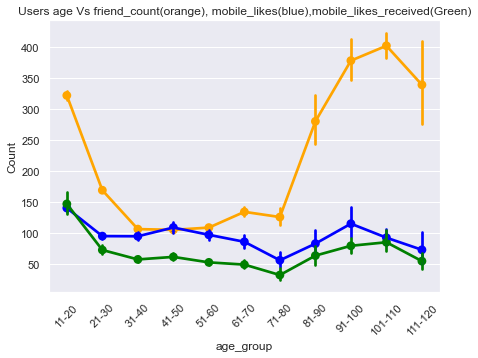

In [43]:
#To get a view on Users age Vs friend_count(orange), mobile_likes(blue),mobile_likes_received(Green)"
fig, ax2 = plt.subplots(figsize=(7,5))
with sns.axes_style('white'):
    g = sns.pointplot(x='age_group', y='friend_count', data=df_fb,color='orange',units=1000, legend = True);
    g = sns.pointplot(x='age_group', y='mobile_likes', data=df_fb,color='blue',units=1000, legend = True);
    g = sns.pointplot(x='age_group', y='mobile_likes_received', data=df_fb,color='green',units=1000, legend = True);
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.title("Users age Vs friend_count(orange), mobile_likes(blue),mobile_likes_received(Green)")
plt.xlabel('age_group')
plt.ylabel('Count')
plt.show()

### HeatMap Correlation based on different variables

Text(0.5, 1.0, 'Heatmap - Correlation based on different variables')

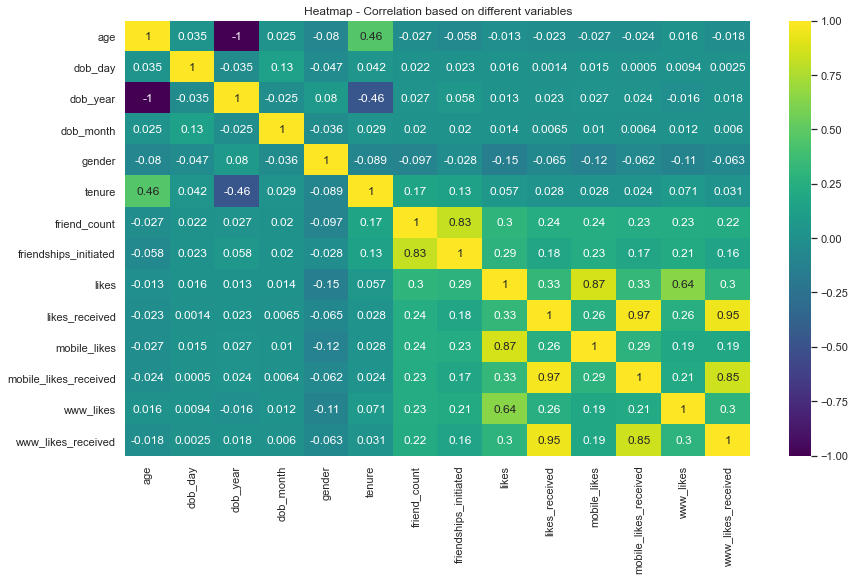

In [44]:
#Heat Map - Correlation based on different variables
# Compute the correlation matrix
corr_df = df_fb.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 8))
# Draw a violinplot with a narrower bandwidth than the default
sns.heatmap(data=corr_df, annot = True, cmap='viridis')
sns.despine(left=True, bottom=True)
plt.title("Heatmap - Correlation based on different variables")
           

## Summary and Conclusion

### Summary


1. Facebook has more of male gender user group higher than female.
2. Age group of 20-30 are heavy users of facebook application and this gives an insight that marketing efforts should be focussed on young people who has time and active interest.
3. It shows between age of 11 to 30 years users are using facebook twice more than 31 ownwards age group.Facebook used by Male is higher than Female user between 11 to 50 year age but after 51 age onwards female usage is gradually increased in comparison to male population.
4. Users have tendency to use facebook more on mobile than web browsers.
5. Insight shows age group 90-99, 10 year ago started using Facebook for socialising. Even it is surprising to see age group    20-29 where using Facebook almost 6-7 years ago i.e. 2006-2007.
6. FB friend requests initiated by Male users is more than female users.
7. In the age group of 81-110,mobile and browser given likes are in high when compared to lower age group.
8. Friendship initiated and Friend count are in correlation and similarly the likes (www_likes, mobile_likes, recieved_likes).
Age and Tenure are partially correlated and it increase as the age increases.

### Conclusion

1. Market more female oriented products to promote Facebook with female genders.
2. Market more education materials for teenagers in age group 20-30.
3. Since Male Friend initiated and friend count is high, it looks Male user group are open to have new friends and accept new friends. 
4. Since the mobile user base is high, Facebook should focus more on UI design on Mobile apps to keep the users engaged and it will increase the revenue of FB in form of sponsored ad clicks.

